# Check latent distances between MNIST digits

## 1. Load a good model

In [1]:
from xai.constants import MODEL_DIR
from xai.models.simple_cnn import CNNClassifier

In [2]:
MODEL_FNAME = 'simple_cnn_50_epochs.pth'

model = CNNClassifier()
model.load(MODEL_DIR / MODEL_FNAME)

## 2. Load data
Split by digit

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from xai.data_handlers.mnist import load_mnist

In [4]:
batch_size = 1024

corpus_loader = load_mnist(subset_size=8192, train=True, batch_size=batch_size) # MNIST train loader
test_loader = load_mnist(subset_size=1024, train=False, batch_size=batch_size) # MNIST test loader
corpus_inputs, corpus_labels = next(iter(corpus_loader)) # A tensor of corpus inputs
test_inputs, test_labels = next(iter(test_loader)) # A set of inputs to explain

In [5]:
test_inputs.shape

torch.Size([1024, 1, 28, 28])

In [6]:
pd.DataFrame(test_labels).value_counts().sort_index()

0     97
1    102
2    109
3    128
4    109
5    103
6     81
7     76
8    118
9    101
Name: count, dtype: int64

Similar numbers of each

In [7]:
# Keys are digits 0 to 9, values are boolean masks where the label is that digit
mask_by_digit = {digit: test_labels == digit for digit in range(10)}
mask_by_digit   

{0: tensor([False,  True, False,  ..., False, False, False]),
 1: tensor([False, False,  True,  ...,  True, False, False]),
 2: tensor([False, False, False,  ..., False,  True, False]),
 3: tensor([False, False, False,  ..., False, False, False]),
 4: tensor([ True, False, False,  ..., False, False,  True]),
 5: tensor([False, False, False,  ..., False, False, False]),
 6: tensor([False, False, False,  ..., False, False, False]),
 7: tensor([False, False, False,  ..., False, False, False]),
 8: tensor([False, False, False,  ..., False, False, False]),
 9: tensor([False, False, False,  ..., False, False, False])}

In [8]:
test_inputs[0][0].shape

torch.Size([28, 28])

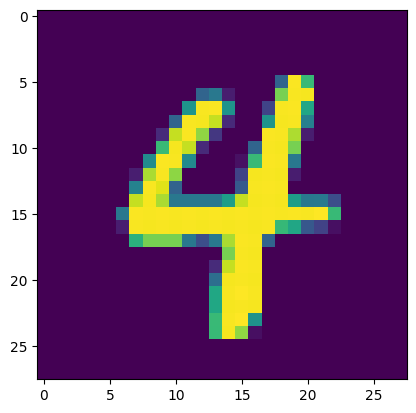

In [9]:
plt.imshow(test_inputs[0][0])

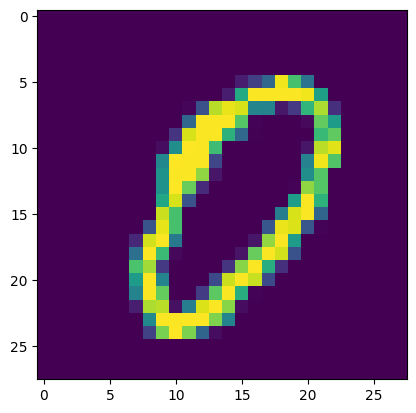

In [12]:
plt.imshow(test_inputs[mask_by_digit[0]][0][0])

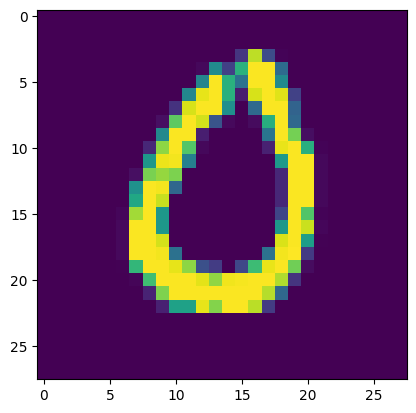

In [13]:
plt.imshow(test_inputs[mask_by_digit[0]][3][0])

In [14]:
input_features_by_digit = {digit: test_inputs[mask_by_digit[digit]] for digit in range(10)}
input_features_by_digit

{0: tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
    

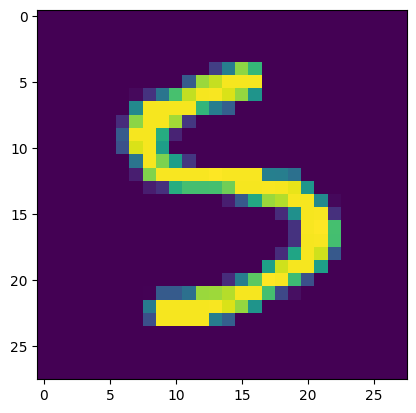

In [15]:
digit = 5
num_pic = 4
plt.imshow(input_features_by_digit[digit][num_pic][0])

## 3. Latent representations per digit

In [16]:
import torch

In [17]:
with torch.no_grad():
    latents_by_digit = {digit: model.latent_representation(input_features_by_digit[digit]) for digit in range(10)}
latents_by_digit

{0: tensor([[ 0.9030,  0.0000,  3.2631,  ...,  0.0000,  6.3664,  0.0000],
         [ 1.9124,  0.0000,  8.9015,  ...,  0.0000, 18.7110,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  1.4866,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]),
 1: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 6.8761],
         [0.0000, 0.9473, 0.0000,  ..., 3.6305, 0.0000, 5.6240],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 1.7552, 4.7814, 4.4644],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 7.9657, 0.0000],
         [0.4533, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]),
 2: tensor([[ 0.0000,  7.2355,  0.0000,  ...,  1.7767,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  3.0384,  0.0000,  0.0000],
 

## 4. Calculate pairwise distances between digits

Is the measure symmetric? No, and it's not deterministic either.

In [18]:
from xai.evaluation_metrics.distance.simplex_distance import SimplexDistance

Pairwise distance measures

In [26]:
results_dict = {k: {} for k in range(10)}
for k in range(10):
    results_dict[k] = {k: np.nan for k in range(10)}

for source_digit in range(10):
    for target_digit in range(10):
        print(f"Running {source_digit}, {target_digit}")
        # Fit a simplex explainer
        sd = SimplexDistance(model, input_features_by_digit[source_digit], input_features_by_digit[target_digit])
        results_dict[source_digit][target_digit] = sd.distance()
        

Running 0, 0
Weight Fitting Epoch: 2000/10000 ; Error: 2.66e+04 ; Regulator: 61.8 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 2.03e+04 ; Regulator: 26.4 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 1.95e+04 ; Regulator: 17.6 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 1.93e+04 ; Regulator: 15.4 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 1.92e+04 ; Regulator: 14.8 ; Reg Factor: 0
Running 0, 1


/tmp/ipykernel_647024/33659852.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  results_dict[source_digit][target_digit] = sd.distance()


Weight Fitting Epoch: 2000/10000 ; Error: 5.58e+04 ; Regulator: 72.5 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 4.99e+04 ; Regulator: 30.6 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 4.91e+04 ; Regulator: 18.2 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 4.88e+04 ; Regulator: 15.1 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 4.88e+04 ; Regulator: 14.3 ; Reg Factor: 0
Running 0, 2
Weight Fitting Epoch: 2000/10000 ; Error: 9.17e+04 ; Regulator: 70.5 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 8.35e+04 ; Regulator: 25.9 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 8.24e+04 ; Regulator: 15.5 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 8.21e+04 ; Regulator: 13 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 8.2e+04 ; Regulator: 12.2 ; Reg Factor: 0
Running 0, 3
Weight Fitting Epoch: 2000/10000 ; Error: 1.27e+05 ; Regulator: 89.8 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error

In [27]:
results_dict

{0: {0: 0.028553278028350514,
  1: 0.04330383899165135,
  2: 0.05254180628225344,
  3: 0.05303451061248779,
  4: 0.0528420880518922,
  5: 0.04966916871302336,
  6: 0.05474907015576775,
  7: 0.06573926423725329,
  8: 0.04097809613761255,
  9: 0.04595862662438119},
 1: {0: 0.05773093312057023,
  1: 0.022059852749693628,
  2: 0.05362557227458429,
  3: 0.049348573684692386,
  4: 0.04454040247365969,
  5: 0.059486374345797934,
  6: 0.052708216537663964,
  7: 0.05624238666735197,
  8: 0.04046365511619439,
  9: 0.047665396208810336},
 2: {0: 0.04846045425257732,
  1: 0.03654459934608609,
  2: 0.02972825636557483,
  3: 0.04552442073822022,
  4: 0.045283273119445244,
  5: 0.056490525921571604,
  6: 0.06003282711829668,
  7: 0.0512138567472759,
  8: 0.03866576631190413,
  9: 0.04557620511196628},
 3: {0: 0.05395282548727449,
  1: 0.04247846715590533,
  2: 0.04740386682912844,
  3: 0.029038777351379396,
  4: 0.048002509720828555,
  5: 0.04440903154391687,
  6: 0.06588909384645061,
  7: 0.05124842

The distance measure seems to work quite well

In [35]:
with open('pairwise_digit_distances.pkl', 'wb') as handle:
    pickle.dump(results_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
results_df = pd.DataFrame(results_dict)
results_df

,0,1,2,3,4,5,6,7,8,9
0,0.028553,0.057731,0.048460,0.053953,0.055020,0.043696,0.045619,0.053408,0.049618,0.053385
1,0.043304,0.022060,0.036545,0.042478,0.036807,0.041419,0.040149,0.038538,0.035527,0.038567
2,0.052542,0.053626,0.029728,0.047404,0.057314,0.063040,0.059394,0.045739,0.050608,0.060305
3,0.053035,0.049349,0.045524,0.029039,0.050280,0.040918,0.052801,0.046261,0.043396,0.047598
4,0.052842,0.044540,0.045283,0.048003,0.026634,0.044476,0.043469,0.045763,0.043516,0.035525
5,0.049669,0.059486,0.056491,0.044409,0.054300,0.030781,0.048720,0.060818,0.047686,0.052579
6,0.054749,0.052708,0.060033,0.065889,0.055904,0.056604,0.036160,0.069098,0.055008,0.066976
7,0.065739,0.056242,0.051214,0.051248,0.061918,0.058854,0.066931,0.037551,0.055833,0.050720
8,0.040978,0.040464,0.038666,0.037115,0.039398,0.033919,0.038274,0.040921,0.025368,0.041053
9,0.045959,0.047665,0.045576,0.040269,0.034347,0.042116,0.049842,0.036648,0.039193,0.026869


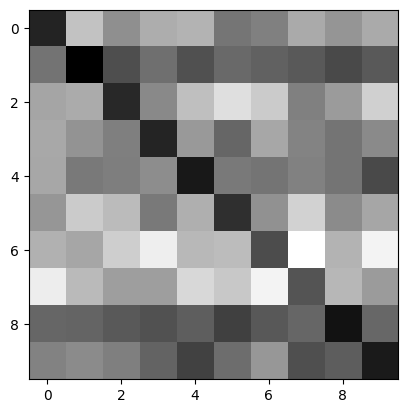

In [45]:
plt.imshow(results_df, cmap='gray')

In [46]:
results_df.clip(0.02, 0.04)

,0,1,2,3,4,5,6,7,8,9
0,0.028553,0.04000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000
1,0.040000,0.02206,0.036545,0.040000,0.036807,0.040000,0.040000,0.038538,0.035527,0.038567
2,0.040000,0.04000,0.029728,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000
3,0.040000,0.04000,0.040000,0.029039,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000
4,0.040000,0.04000,0.040000,0.040000,0.026634,0.040000,0.040000,0.040000,0.040000,0.035525
5,0.040000,0.04000,0.040000,0.040000,0.040000,0.030781,0.040000,0.040000,0.040000,0.040000
6,0.040000,0.04000,0.040000,0.040000,0.040000,0.040000,0.036160,0.040000,0.040000,0.040000
7,0.040000,0.04000,0.040000,0.040000,0.040000,0.040000,0.040000,0.037551,0.040000,0.040000
8,0.040000,0.04000,0.038666,0.037115,0.039398,0.033919,0.038274,0.040000,0.025368,0.040000
9,0.040000,0.04000,0.040000,0.040000,0.034347,0.040000,0.040000,0.036648,0.039193,0.026869


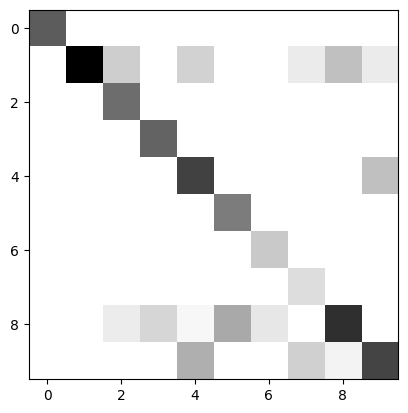

In [47]:
plt.imshow(results_df.clip(0.02, 0.04), cmap='gray')

Targets are on y-axis, source on x-axis

## 5. How does this compare to pairwise (mis)classifications
Use the same model to predict classifications. Do the results look similar?
Do the latents show any potential misclassifications that haven't occurred in the test data yet but we should be wary of
if running this model in practice?

In [48]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [55]:
with torch.no_grad():
    output_probs = model.probabilities(test_inputs)
output_probs

tensor([[4.0012e-06, 7.6458e-06, 1.1279e-03,  ..., 2.2863e-04, 9.2026e-06,
         2.8879e-03],
        [9.9819e-01, 9.7990e-06, 2.4913e-05,  ..., 1.2318e-07, 1.3900e-06,
         8.8877e-07],
        [7.1790e-09, 9.9800e-01, 6.5159e-08,  ..., 1.4787e-10, 1.8054e-04,
         5.8939e-08],
        ...,
        [4.7650e-04, 4.2198e-02, 1.3044e-03,  ..., 2.1570e-04, 2.7210e-02,
         5.3552e-04],
        [3.8647e-06, 1.4448e-03, 9.7348e-01,  ..., 2.0839e-06, 1.5012e-02,
         2.1782e-09],
        [1.4293e-06, 3.3542e-02, 7.9820e-08,  ..., 4.0630e-05, 2.6393e-02,
         2.8513e-02]])

In [56]:
output_probs.shape

torch.Size([1024, 10])

In [57]:
predicted_classes = torch.argmax(output_probs, dim=1)
predicted_classes

tensor([4, 0, 1,  ..., 4, 2, 4])

In [58]:
predicted_classes

tensor([4, 0, 1,  ..., 4, 2, 4])

In [59]:
test_labels

tensor([4, 0, 1,  ..., 1, 2, 4])

Accuracy measures

In [60]:
accuracy_score(test_labels, predicted_classes)

0.9287109375

Accuracy by class

In [62]:
accuracy_by_digit = {
    digit: accuracy_score(test_labels[test_labels==digit], predicted_classes[test_labels==digit]) 
    for digit in range(10)
}
accuracy_by_digit

{0: 0.9690721649484536,
 1: 0.9803921568627451,
 2: 0.8990825688073395,
 3: 0.9296875,
 4: 0.8990825688073395,
 5: 0.9320388349514563,
 6: 0.9753086419753086,
 7: 0.9473684210526315,
 8: 0.8559322033898306,
 9: 0.9306930693069307}

Accuracy for 1 is very high but latent space distances show it ishould not be so confident.

Accuracy for 8 is lower and has a similarly spread range of values as 1. Similar distance distribution but different accuracies.

AUC

In [64]:
f1_score(test_labels, predicted_classes, average='micro')

0.9287109375

In [65]:
roc_auc_score(test_labels, output_probs.detach(), multi_class='ovr')

0.9937956527807641

In [81]:
roc_auc_score(test_labels, output_probs.detach(), multi_class='ovo')

0.9939015570413103

Pairwise plot of misclassifications

In [102]:
accuracy_dict = {k: {} for k in range(10)}
for k in range(10):
    accuracy_dict[k] = {k: np.nan for k in range(10)}

for true_digit in range(10):
    mask = test_labels==true_digit
    predictions_for_digit = predicted_classes[mask]
    digit_count_total = float(torch.sum(mask))
    for predicted_digit in range(10):
        digit_count_pred = float(torch.sum(predictions_for_digit == predicted_digit))
        accuracy_dict[true_digit][predicted_digit] = digit_count_pred / digit_count_total
        


In [132]:
with open('pairwise_digit_accuracy_test.pkl', 'wb') as handle:
    pickle.dump(accuracy_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [103]:
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df

,0,1,2,3,4,5,6,7,8,9
0,0.969072,0.000000,0.027523,0.000000,0.000000,0.009709,0.012346,0.013158,0.000000,0.019802
1,0.000000,0.980392,0.018349,0.007812,0.000000,0.000000,0.000000,0.013158,0.025424,0.000000
2,0.000000,0.000000,0.899083,0.015625,0.018349,0.000000,0.000000,0.026316,0.033898,0.000000
3,0.000000,0.009804,0.009174,0.929688,0.000000,0.019417,0.000000,0.000000,0.016949,0.000000
4,0.000000,0.009804,0.009174,0.000000,0.899083,0.000000,0.012346,0.000000,0.000000,0.029703
5,0.000000,0.000000,0.000000,0.023438,0.009174,0.932039,0.000000,0.000000,0.016949,0.000000
6,0.030928,0.000000,0.009174,0.007812,0.009174,0.000000,0.975309,0.000000,0.000000,0.009901
7,0.000000,0.000000,0.009174,0.000000,0.000000,0.009709,0.000000,0.947368,0.008475,0.009901
8,0.000000,0.000000,0.009174,0.007812,0.018349,0.019417,0.000000,0.000000,0.855932,0.000000
9,0.000000,0.000000,0.009174,0.007812,0.045872,0.009709,0.000000,0.000000,0.042373,0.930693


In [121]:
# Smallest value on diagonal
min_true_pct = np.min(np.diag(accuracy_df))
min_true_pct

0.8559322033898306

In [123]:
max_false_pct = np.max(accuracy_df[accuracy_df < min_true_pct])
max_false_pct

0.045871559633027525

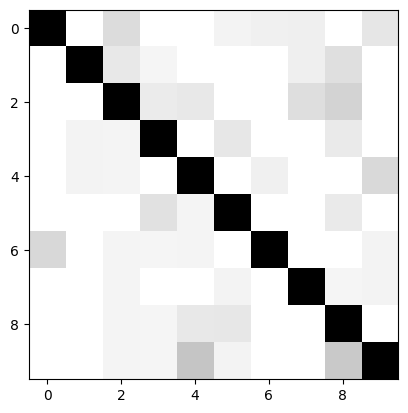

In [130]:
plt.imshow(accuracy_df.clip(0., 0.2), cmap='gray_r', )

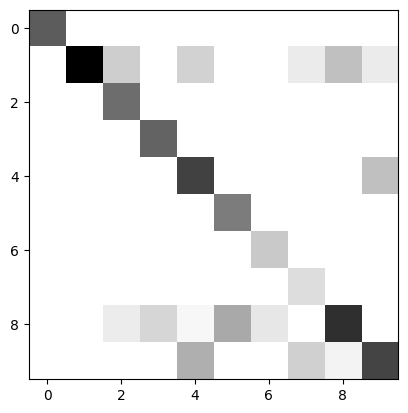

In [47]:
plt.imshow(results_df.clip(0.02, 0.04), cmap='gray')

In [131]:
accuracy_by_digit

{0: 0.9690721649484536,
 1: 0.9803921568627451,
 2: 0.8990825688073395,
 3: 0.9296875,
 4: 0.8990825688073395,
 5: 0.9320388349514563,
 6: 0.9753086419753086,
 7: 0.9473684210526315,
 8: 0.8559322033898306,
 9: 0.9306930693069307}

The accuracy is so high that the misclassifications are not meaningful as there are so few.

But the distances use the entire test set.

## Investigate the scaling of the distance calc

In [134]:
sd._distance_per_point.shape

torch.Size([101, 50])

In [143]:
sd._distance_per_point[:70].shape

torch.Size([70, 50])

In [152]:
sd._distance_per_point[:, :20].shape

torch.Size([101, 20])

In [136]:
sd.distance()

/tmp/ipykernel_647024/1151028196.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  sd.distance()


0.026868929721341275

In [138]:
torch.sqrt(torch.sum(sd._distance_per_point ** 2))

tensor(135.6881)

Slice the rows

In [146]:
torch.norm(sd._distance_per_point[:10], 'fro')

tensor(42.8003)

In [147]:
torch.norm(sd._distance_per_point[:20], 'fro')

tensor(64.3653)

In [148]:
torch.norm(sd._distance_per_point[:30], 'fro')

tensor(76.8539)

In [149]:
torch.norm(sd._distance_per_point[:40], 'fro')

tensor(88.0265)

In [150]:
torch.norm(sd._distance_per_point[:50], 'fro')

tensor(95.2906)

In [151]:
torch.norm(sd._distance_per_point[:60], 'fro')

tensor(102.3913)

Slice the columns

In [153]:
torch.norm(sd._distance_per_point[:,:10], 'fro')

tensor(66.8234)

In [154]:
torch.norm(sd._distance_per_point[:,:20], 'fro')

tensor(85.7305)

In [155]:
torch.norm(sd._distance_per_point[:,:30], 'fro')

tensor(105.0055)

In [156]:
torch.norm(sd._distance_per_point[:,:40], 'fro')

tensor(122.0684)

In [157]:
torch.norm(sd._distance_per_point[:,:50], 'fro')

tensor(135.6881)

Divide by the diagonal

In [165]:
np.diag(results_df.to_numpy())

array([0.02855328, 0.02205985, 0.02972826, 0.02903878, 0.02663421,
       0.03078099, 0.03615956, 0.03755069, 0.02536767, 0.02686893])

In [179]:
diag_values = np.diag(results_df.to_numpy())
scaled_results_df = (results_df / diag_values) - 1
scaled_results_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.617014,0.630114,0.857958,1.065773,0.419578,0.261609,0.422301,0.955951,0.986870
1,0.516598,0.000000,0.229288,0.462819,0.381946,0.345590,0.110318,0.026298,0.400489,0.435364
2,0.840132,1.430913,0.000000,0.632433,1.151881,1.048011,0.642553,0.218055,0.994969,1.244400
3,0.857388,1.237031,0.531352,0.000000,0.887812,0.329323,0.460217,0.231965,0.710665,0.771500
4,0.850649,1.019071,0.523240,0.653049,0.000000,0.444923,0.202151,0.218695,0.715420,0.322163
5,0.739526,1.696590,0.900230,0.529301,1.038716,0.000000,0.347353,0.619623,0.879781,0.956866
6,0.917436,1.389328,1.019386,1.269004,1.098964,0.838919,0.000000,0.840131,1.168432,1.492697
7,1.302337,1.549536,0.722733,0.764827,1.324770,0.912037,0.850983,0.000000,1.200938,0.887696
8,0.435145,0.834267,0.300640,0.278107,0.479222,0.101952,0.058472,0.089744,0.000000,0.527916
9,0.609574,1.160730,0.533094,0.386730,0.289600,0.368245,0.378379,-0.024030,0.544979,0.000000


In [185]:
scaled_results_df2 = results_df.copy()
for i in range(10):
    scaled_results_df2.loc[i, :] = (scaled_results_df2.loc[i, :] / diag_values[i]) - 1
    

In [186]:
scaled_results_df2

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.021867,0.697194,0.889549,0.926932,0.530332,0.597688,0.870482,0.737731,0.869666
1,0.963016,0.000000,0.656611,0.925601,0.668508,0.877556,0.819985,0.746984,0.610489,0.748276
2,0.767403,0.803859,0.000000,0.594573,0.927918,1.120535,0.997897,0.538563,0.702344,1.028529
3,0.826334,0.699403,0.567711,0.000000,0.731490,0.409077,0.818286,0.593081,0.494401,0.639129
4,0.983993,0.672301,0.700192,0.802288,0.000000,0.669889,0.632084,0.718197,0.633847,0.333815
5,0.613631,0.932569,0.835241,0.442742,0.764062,0.000000,0.582785,0.975828,0.549192,0.708161
6,0.514097,0.457657,0.660220,0.822176,0.546043,0.565389,0.000000,0.910925,0.521260,0.852238
7,0.750681,0.497772,0.363859,0.364780,0.648929,0.567332,0.782411,0.000000,0.486861,0.350717
8,0.615367,0.595088,0.524214,0.463070,0.553075,0.337103,0.508766,0.613101,0.000000,0.618338
9,0.710475,0.773997,0.696242,0.498718,0.278335,0.567459,0.854990,0.363967,0.458655,0.000000


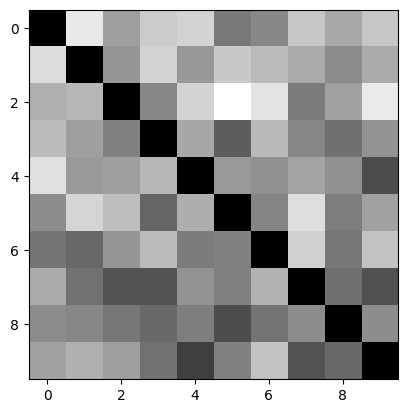

In [188]:
plt.imshow(scaled_results_df2, cmap='gray')

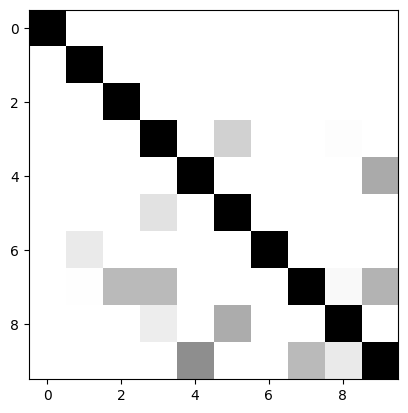

In [191]:
plt.imshow(scaled_results_df2.clip(0, 0.5), cmap='gray')

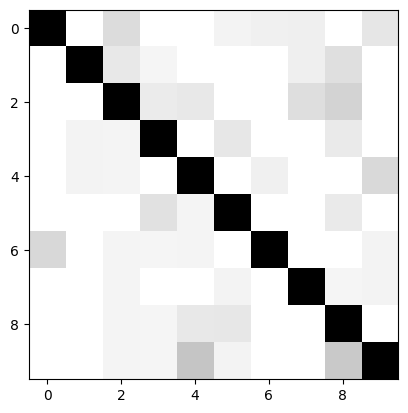

In [193]:
plt.imshow(accuracy_df.clip(0., 0.2), cmap='gray_r', )

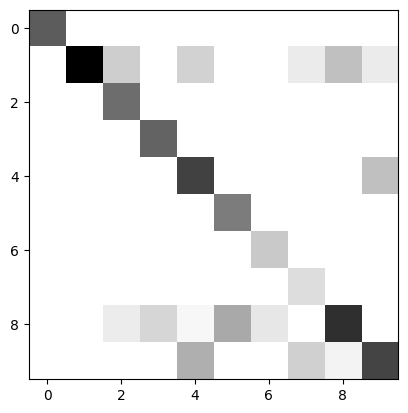

In [47]:
plt.imshow(results_df.clip(0.02, 0.04), cmap='gray')

# Scratch

In [19]:
sd1 = SimplexDistance(model, input_features_by_digit[0], input_features_by_digit[1])

In [20]:
sd1.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 5.51e+04 ; Regulator: 69.3 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 4.9e+04 ; Regulator: 25.2 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 4.81e+04 ; Regulator: 13.7 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 4.79e+04 ; Regulator: 11 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 4.78e+04 ; Regulator: 10.3 ; Reg Factor: 0


/tmp/ipykernel_647024/1845556788.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  sd1.distance()


0.04286562152937347

In [158]:
sd2 = SimplexDistance(model, input_features_by_digit[1], input_features_by_digit[0])

In [159]:
sd2.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 9.75e+04 ; Regulator: 76.8 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 9.09e+04 ; Regulator: 29.8 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 8.99e+04 ; Regulator: 15.3 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 8.97e+04 ; Regulator: 11.7 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 8.97e+04 ; Regulator: 10.6 ; Reg Factor: 0


299.4393310546875

In [160]:
sd3 = SimplexDistance(model, input_features_by_digit[0], input_features_by_digit[1], simplex=sd1.simplex)
sd3.distance()

260.53839111328125

In [161]:
sd4 = SimplexDistance(model, input_features_by_digit[0], input_features_by_digit[0])
sd4.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 3.41e+04 ; Regulator: 70.3 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 2.6e+04 ; Regulator: 30.7 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 2.48e+04 ; Regulator: 20.7 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 2.45e+04 ; Regulator: 18.1 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 2.44e+04 ; Regulator: 17.4 ; Reg Factor: 0


156.2950439453125

In [162]:
sd5 = SimplexDistance(model, input_features_by_digit[0], input_features_by_digit[8])
sd5.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 6.2e+04 ; Regulator: 67.8 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 5.6e+04 ; Regulator: 28.7 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 5.52e+04 ; Regulator: 17.6 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 5.49e+04 ; Regulator: 15 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 5.49e+04 ; Regulator: 14.4 ; Reg Factor: 0


234.23135375976562

In [163]:
sd6 = SimplexDistance(model, input_features_by_digit[1], input_features_by_digit[1])
sd6.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 2.14e+04 ; Regulator: 84.2 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 1.62e+04 ; Regulator: 39.3 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 1.55e+04 ; Regulator: 27.9 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 1.53e+04 ; Regulator: 25.1 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 1.53e+04 ; Regulator: 24.4 ; Reg Factor: 0


123.58036804199219

Can we scale the distance measure better?

In [118]:
self = sd1

In [119]:
target_latents_approx = self.simplex.latent_approx()

In [121]:
target_latents_approx.shape

torch.Size([122, 50])

In [123]:
self.target_latents.shape

torch.Size([122, 50])

In [124]:
self._distance_per_point = self.target_latents - target_latents_approx

In [132]:
self._distance_per_point.shape

torch.Size([122, 50])

6100

In [129]:
residual = torch.sqrt(torch.sum(self._distance_per_point ** 2)) 
residual

tensor(246.6844)

In [137]:
self.target_latents.shape[0]

122

In [139]:
torch.norm(self._distance_per_point)

tensor(246.6844)

In [141]:
torch.norm(self._distance_per_point, p=2)

tensor(246.6844)

In [144]:
float(residual / (122 * 50))


0.04044007137417793

In [164]:
self = sd1
self.distance() / (np.product(self._distance_per_point.shape))

0.04066192626953125

In [165]:
self = sd2
self.distance() / (np.product(self._distance_per_point.shape))

0.05649798699145047

In [166]:
self = sd3
self.distance() / (np.product(self._distance_per_point.shape))

0.04271121165791496

In [167]:
self = sd4
self.distance() / (np.product(self._distance_per_point.shape))

0.02948963093307783

In [168]:
self = sd5
self.distance() / (np.product(self._distance_per_point.shape))

0.048295124486549615

In [169]:
self = sd6
self.distance() / (np.product(self._distance_per_point.shape))

0.020259076728195442